In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from itertools import compress
from numpy.random import normal
from soinn.gsoinnplus import GSoinnPlus

In [3]:
# generate data
n = 500
sigma = 0.07
c = 10 * np.random.rand(n) - 5
X = np.array([[normal(c[i], sigma), normal(np.sin(c[i]), sigma)] for i in range(len(c))])
label1 = np.ones(len(c))
X2 = np.array([[normal(c[i], sigma), normal(np.cos(c[i]), sigma)] for i in range(len(c))])
label2 = np.ones(len(c)) * 2
train_data = np.concatenate([X, X2])
labels = np.concatenate([label1, label2])

stacked_arr = np.column_stack([train_data, labels])
random_perm = np.random.permutation(stacked_arr.shape[0])
stacked_arr = stacked_arr[random_perm]

train_data, labels = np.hsplit(stacked_arr, [2])

# print(labels)

In [4]:
# initialize SOINN
s = GSoinnPlus(fracPow = 2, limit = 10000, delete_node_period=300, init_node_num=3)
s.fit(train_data, labels)


Winners: [2, 0]
Force Create Link [True, True]
Number of Nodes: 4
Running Variance Threshold: [0. 0.]
Running Mean: [0. 0.]
Link Created: 0
Node Deleted: 0
Edge Deleted: 0
Winners: [1, 0]
Force Create Link [True, True]
Number of Nodes: 5
Running Variance Threshold: [0. 0.]
Running Mean: [0. 0.]
Link Created: 0
Node Deleted: 0
Edge Deleted: 0
Winners: [2, 3]
Force Create Link [True, True]
Number of Nodes: 6
Running Variance Threshold: [0. 0.]
Running Mean: [0. 0.]
Link Created: 0
Node Deleted: 0
Edge Deleted: 0
Winners: [0, 3]
Force Create Link [True, True]
Number of Nodes: 7
Running Variance Threshold: [0. 0.]
Running Mean: [0. 0.]
Link Created: 0
Node Deleted: 0
Edge Deleted: 0
Winners: [6, 0]
Force Create Link [True, True]
Number of Nodes: 8
Running Variance Threshold: [0. 0.]
Running Mean: [0. 0.]
Link Created: 0
Node Deleted: 0
Edge Deleted: 0
Winners: [1, 4]
Force Create Link [True, True]
Number of Nodes: 9
Running Variance Threshold: [0. 0.]
Running Mean: [0. 0.]
Link Created: 0


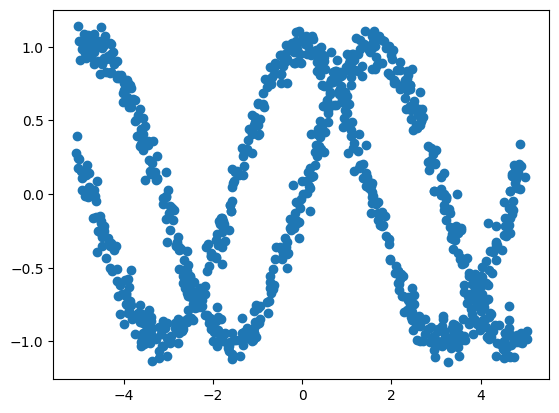

In [5]:
plt.scatter(train_data[:, 0], train_data[:, 1])
plt.show()

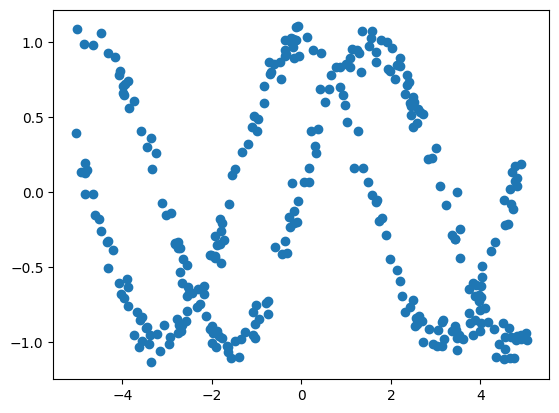

In [6]:
plt.scatter(s.nodes[:,0], s.nodes[:,1])
plt.show()

In [7]:
from scipy.sparse import triu
for x, y in triu(s.adjacent_mat).todok().items():
    print(x, y)

(4, 9) 7.0
(10, 11) 8.0
(5, 12) 2.0
(9, 13) 2.0
(6, 15) 7.0
(16, 21) 6.0
(13, 23) 8.0
(19, 24) 2.0
(2, 25) 3.0
(6, 26) 7.0
(14, 30) 3.0
(30, 32) 4.0
(29, 33) 3.0
(14, 34) 2.0
(22, 35) 6.0
(12, 36) 2.0
(3, 39) 2.0
(18, 40) 2.0
(20, 43) 3.0
(41, 44) 2.0
(37, 46) 2.0
(47, 48) 2.0
(42, 50) 3.0
(38, 52) 2.0
(16, 53) 4.0
(21, 53) 4.0
(45, 54) 2.0
(37, 55) 4.0
(29, 56) 2.0
(51, 57) 2.0
(7, 58) 6.0
(1, 60) 2.0
(59, 63) 2.0
(8, 64) 2.0
(22, 65) 4.0
(18, 66) 3.0
(23, 67) 3.0
(11, 68) 2.0
(62, 69) 4.0
(10, 70) 2.0
(17, 71) 2.0
(31, 72) 3.0
(49, 73) 5.0
(62, 74) 3.0
(61, 75) 3.0
(7, 76) 2.0
(58, 76) 3.0
(76, 79) 2.0
(78, 79) 4.0
(49, 80) 2.0
(2, 83) 4.0
(73, 83) 3.0
(54, 84) 2.0
(77, 85) 2.0
(53, 87) 2.0
(50, 88) 4.0
(69, 89) 2.0
(74, 89) 3.0
(4, 90) 2.0
(86, 90) 2.0
(72, 91) 2.0
(44, 93) 3.0
(92, 94) 2.0
(20, 96) 4.0
(81, 97) 3.0
(22, 99) 4.0
(55, 100) 4.0
(86, 102) 2.0
(73, 103) 2.0
(101, 104) 3.0
(62, 105) 2.0
(35, 107) 2.0
(82, 108) 2.0
(106, 109) 2.0
(81, 110) 2.0
(61, 112) 2.0
(72, 113) 2.0


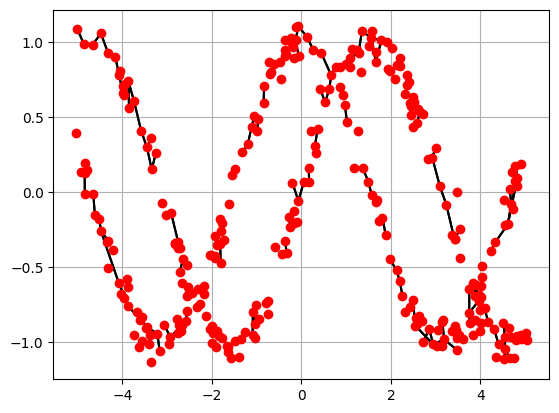

In [8]:
# show SOINN's state
# plt.plot(X[:, 0], X[:, 1], 'cx')
nodes = s.nodes
for k in s.adjacent_mat.keys():
    plt.plot(nodes[k, 0], nodes[k, 1], 'k')
plt.plot(nodes[:, 0], nodes[:, 1], 'ro')
plt.grid(True)

In [14]:
# Subspace check
subspace = s.subSpace

for key, val in subspace.items():
    print(key)

AttributeError: 'numpy.int64' object has no attribute '__dict__'